In [1]:
import numpy as np
import torch


import json
from torch.utils.data import DataLoader
from torch.optim import SGD,AdamW 
from torch import nn

In [2]:
import utils_generic as generic
import singletask_simple as st
import model_confs as confs


import train

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.manual_seed(27)

In [4]:
model_conf = confs.distilbert_conf

# Datos ConvAI2

In [5]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [6]:
convai_train = data['train']
convai_val = data['validation']



convai_train_token = generic.tokenize_dataset(convai_train,['about','to','as'],model_conf) 
convai_val_token = generic.tokenize_dataset(convai_val,['about','to','as'],model_conf) 

In [7]:
convai_train_dataset = {}
for task in ['to','as','about']:
    convai_train_dataset[task] = st.DatasetSingleTaskSimple(convai_train_token,task,eval=False)

In [8]:
convai_val_dataset = {}
for task in ['to','as','about']:
    convai_val_dataset[task] = st.DatasetSingleTaskSimple(convai_val_token,task,eval=False)

In [7]:
convai_test = data['test']
convai_test_token = generic.tokenize_dataset(convai_test,['about','to','as'],model_conf) 

convai_test_dataset = {}
for task in ['to','as','about']:
    convai_test_dataset[task] = st.DatasetSingleTaskSimple(convai_test_token,task,eval=True)

## Datos md_gender

In [8]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

In [9]:
md_tokenized = generic.tokenize_dataset(md_data,['about','to','as'],model_conf) 


md_dataset = {}
for task in ['to','as','about']:
    md_dataset[task] = st.DatasetSingleTaskSimple(md_tokenized,task,eval=True)

# Creación dataloaders

In [11]:
dl_train = {}
for task in ['to','as','about']:
    dl_train[task] = DataLoader(convai_train_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [12]:
dl_val = {}
for task in ['to','as','about']:
    dl_val[task] = DataLoader(convai_val_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [10]:
dl_eval = {}
for task in ['to','as','about']:
    dl_eval[task] = DataLoader(md_dataset[task],batch_size=128,shuffle=False,collate_fn=st.collate_fn)

In [11]:
dl_test = {}
for task in ['to','as','about']:
    dl_test[task] = DataLoader(convai_test_dataset[task],batch_size=128,shuffle=False,collate_fn=st.collate_fn)

# ABOUT

In [19]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_distilbert_ABOUT_adam'

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.5787377603585712 	 Validation loss: 0.4205701310755843 	 
  1%|          | 574/57400 [02:08<3:27:09,  4.57it/s]
Epoch 2 	 Training loss: 0.3901936617462477 	 Validation loss: 0.3591900589102406 	 
  2%|▏         | 1148/57400 [04:17<3:33:55,  4.38it/s]
Epoch 3 	 Training loss: 0.3526358843265095 	 Validation loss: 0.3432380380266804 	 
  3%|▎         | 1722/57400 [06:26<3:17:59,  4.69it/s]
Epoch 4 	 Training loss: 0.3332088539045862 	 Validation loss: 0.3327018184176946 	 
  4%|▍         | 2296/57400 [08:35<3:25:12,  4.48it/s]
Epoch 5 	 Training loss: 0.31924703961257733 	 Validation loss: 0.3246030951455488 	 
  5%|▌         | 2870/57400 [10:45<3:48:28,  3.98it/s]
Epoch 6 	 Training loss: 0.3078252978700794 	 Validation loss: 0.32068962641691756 	 
  6%|▌         | 3444/57400 [12:54<3:14:24,  4.63it/s]
Epoch 7 	 Training loss: 0.29832570667570063 	 Validation loss: 0.3150208299442873 	 
  7%|▋         | 4018/57400 [15:02<3:12:05,  4.63it/s]
Epoch 8 	 Training

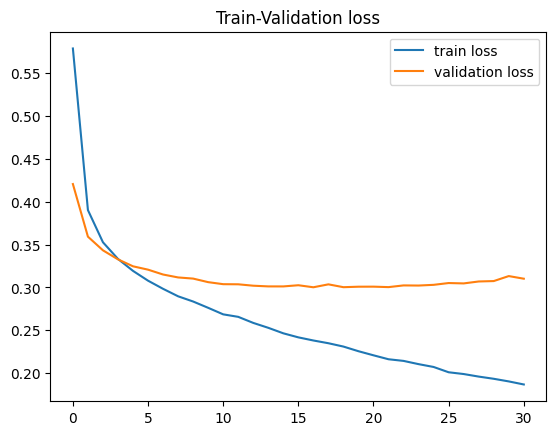

In [15]:
learning_rate = 1e-6
optimizer = AdamW(model.parameters(), lr=learning_rate,weight_decay=0.1)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['about'],optimizer,early_stop=10,dl_val=dl_val['about'],save_path=save_path)

In [16]:

model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
   
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using scikit learn accuracy por género en el conjunto about
GLOBAL: 0.8290816326530612
MALE 0.8072916666666666
FEMALE 0.85 

Using scikit learn accuracy por género en el conjunto to
GLOBAL: 0.6603535353535354
MALE 0.635036496350365
FEMALE 0.6876640419947506 

Using scikit learn accuracy por género en el conjunto as
GLOBAL: 0.6766623207301173
MALE 0.6338383838383839
FEMALE 0.7223719676549866 



In [20]:

model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
   
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_test[task])}")
    print(f"MALE {train.eval_function_single_sk(model,dl_test[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_test[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using scikit learn accuracy por género en el conjunto about
GLOBAL: 0.8703185392509662
MALE 0.8970691676436108
FEMALE 0.8350833848054354 

Using scikit learn accuracy por género en el conjunto to
GLOBAL: 0.5040650406504065
MALE 0.596
FEMALE 0.43286978508217444 

Using scikit learn accuracy por género en el conjunto as
GLOBAL: 0.5111288817806211
MALE 0.5996077332586158
FEMALE 0.4385348720521826 



# TO

In [29]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_distilbert_TO_adam'

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6953010200831118 	 Validation loss: 0.6936414433737933 	 
  1%|          | 574/57400 [02:09<3:23:39,  4.65it/s]
Epoch 2 	 Training loss: 0.6941195333876261 	 Validation loss: 0.6931308851403705 	 
  2%|▏         | 1148/57400 [04:17<3:23:39,  4.60it/s]
Epoch 3 	 Training loss: 0.693442328881719 	 Validation loss: 0.6939917085534435 	 
  3%|▎         | 1722/57400 [06:24<3:20:14,  4.63it/s]
Epoch 4 	 Training loss: 0.693187739583258 	 Validation loss: 0.6935343883805356 	 
  4%|▍         | 2296/57400 [08:32<3:17:28,  4.65it/s]
Epoch 5 	 Training loss: 0.693251896506818 	 Validation loss: 0.6935173434726263 	 
  5%|▌         | 2870/57400 [10:41<2:43:28,  5.56it/s]
Epoch 6 	 Training loss: 0.6931047845592897 	 Validation loss: 0.6928112830145884 	 
  6%|▌         | 3444/57400 [12:49<3:18:45,  4.52it/s]
Epoch 7 	 Training loss: 0.6929542408795307 	 Validation loss: 0.6933054459297051 	 
  7%|▋         | 4018/57400 [14:56<3:14:39,  4.57it/s]
Epoch 8 	 Training loss:

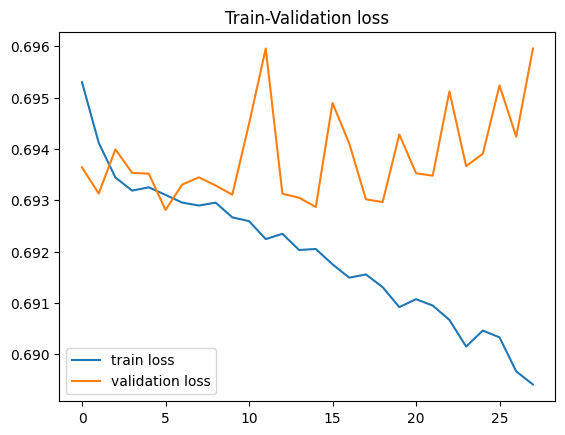

In [18]:
learning_rate = 1e-6
optimizer = AdamW(model.parameters(), lr=learning_rate,weight_decay=0.1)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['to'],optimizer,early_stop=10,dl_val=dl_val['to'],save_path=save_path)

In [19]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GLOBAL: 0.48086734693877553 

Using scikit learn accuracy por género en el conjunto about
MALE 0.6041666666666666
FEMALE 0.3625 

GLOBAL: 0.5113636363636364 

Using scikit learn accuracy por género en el conjunto to
MALE 0.6520681265206812
FEMALE 0.35958005249343833 

GLOBAL: 0.49282920469361147 

Using scikit learn accuracy por género en el conjunto as
MALE 0.49242424242424243
FEMALE 0.49326145552560646 



In [31]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
   
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_test[task])}")
    print(f"MALE {train.eval_function_single_sk(model,dl_test[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_test[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using scikit learn accuracy por género en el conjunto about
GLOBAL: 0.5615087298413968
MALE 0.4044548651817116
FEMALE 0.7683755404570722 

Using scikit learn accuracy por género en el conjunto to
GLOBAL: 0.5073970411835266
MALE 0.3320235756385069
FEMALE 0.6645521441258564 

Using scikit learn accuracy por género en el conjunto as
GLOBAL: 0.5140610422497668
MALE 0.3426395939086294
FEMALE 0.6805240614764424 



# AS

In [20]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_distilbert_AS_adam'

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6953757495622601 	 Validation loss: 0.6921219492362718 	 
  1%|          | 574/57400 [02:07<2:53:20,  5.46it/s]
Epoch 2 	 Training loss: 0.6938062067231234 	 Validation loss: 0.6918491559513544 	 
  2%|▏         | 1148/57400 [04:15<3:25:59,  4.55it/s]
Epoch 3 	 Training loss: 0.6923914565234234 	 Validation loss: 0.6921710968017578 	 
  3%|▎         | 1722/57400 [06:24<3:26:23,  4.50it/s]
Epoch 4 	 Training loss: 0.69126322356666 	 Validation loss: 0.6932954959950205 	 

1 epoch without improvement
  4%|▍         | 2296/57400 [08:30<3:18:08,  4.63it/s]
Epoch 5 	 Training loss: 0.6900827700875778 	 Validation loss: 0.6926951317463891 	 
  5%|▌         | 2870/57400 [10:33<3:08:56,  4.81it/s]
Epoch 6 	 Training loss: 0.6887615184958388 	 Validation loss: 0.6936347393666283 	 

2 epoch without improvement
  6%|▌         | 3444/57400 [12:36<3:08:13,  4.78it/s]
Epoch 7 	 Training loss: 0.6881769851940435 	 Validation loss: 0.6913180987713701 	 
  7%|▋         | 401

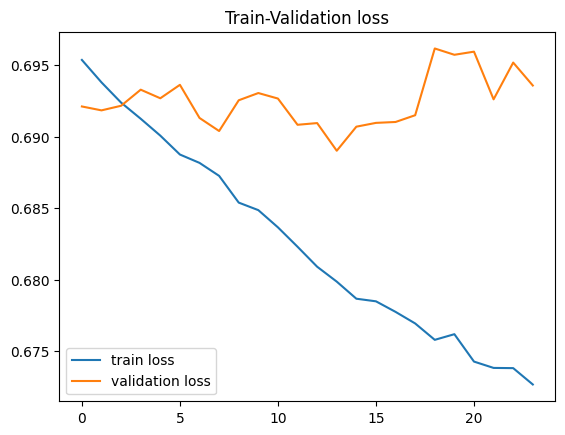

In [21]:
learning_rate = 1e-6
optimizer = AdamW(model.parameters(), lr=learning_rate,weight_decay=0.1)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['as'],optimizer,early_stop=10,dl_val=dl_val['as'],save_path=save_path)

In [22]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GLOBAL: 0.6543367346938775 

Using scikit learn accuracy por género en el conjunto about
MALE 0.5963541666666666
FEMALE 0.71 

GLOBAL: 0.6414141414141414 

Using scikit learn accuracy por género en el conjunto to
MALE 0.6180048661800487
FEMALE 0.6666666666666666 

GLOBAL: 0.6962190352020861 

Using scikit learn accuracy por género en el conjunto as
MALE 0.6212121212121212
FEMALE 0.7762803234501348 



In [12]:

model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load('m1_distilbert_AS_adam'))

for task in ['about','to','as']:
   
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_test[task])}")
    print(f"MALE {train.eval_function_single_sk(model,dl_test[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_test[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using scikit learn accuracy por género en el conjunto about
GLOBAL: 0.6129548180727709
MALE 0.5101992966002344
FEMALE 0.7483014206300185 

Using scikit learn accuracy por género en el conjunto to
GLOBAL: 0.5061975209916033
MALE 0.40300230946882215
FEMALE 0.5978370221327968 

Using scikit learn accuracy por género en el conjunto as
GLOBAL: 0.5288551246168199
MALE 0.42332135949157224
FEMALE 0.6194801917739087 

